<a href="https://colab.research.google.com/github/martinpius/Applied-Predictive-Modeling2/blob/master/Training_inbuilt_model_saving_reuse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)
try:
  COLAB = True
  import tensorflow as tf
  print(f"You are using Colab with tensorflow verssion {tf.__version__}")
except Exception as e:
  COLAB = False
  print(f"{type(e)}: {e}\n...Load Your Drive Please...")
def timeset(t):
  '''take running time in seconds and return the nice format'''
  hours = int(t/(60 *60))
  minutes = int(t % (60 * 60)/60)
  seconds = int(t % 60)
  return f"{hours}: {minutes:>02}: {seconds:>05.2f}"

timeset(127.9885756)

Mounted at /content/drive
You are using Colab with tensorflow verssion 2.4.0


'0: 02: 07.00'

In [3]:
#Using keras callbacks as checkpoint or early stoping

In [4]:
#Example with a simple resnet using mnist data

In [5]:
import tensorflow as tf

In [6]:
inputs = tf.keras.Input(shape = (32,32,3), name = 'mnist_img')
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu')(inputs)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu')(x)
out = tf.keras.layers.MaxPooling2D(pool_size = 3)(x)

x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(out)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
block_1 = tf.keras.layers.concatenate([x, out])

x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(block_1)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
block_2 = tf.keras.layers.concatenate([x, block_1])

x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(block_2)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
block_3 = tf.keras.layers.concatenate([x, block_2])

x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(block_3)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
out1 = tf.keras.layers.concatenate([x, block_3])

x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation ='relu', padding = 'same')(out1)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units = 1024, activation = 'relu')(x)
x = tf.keras.layers.Dropout(rate = 0.5)(x)
outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'simple_resnet')


Model: "simple_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
mnist_img (InputLayer)          [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 128)  3584        mnist_img[0][0]                  
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   73792       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 10, 10, 64)   0           conv2d_1[0][0]                   
______________________________________________________________________________________

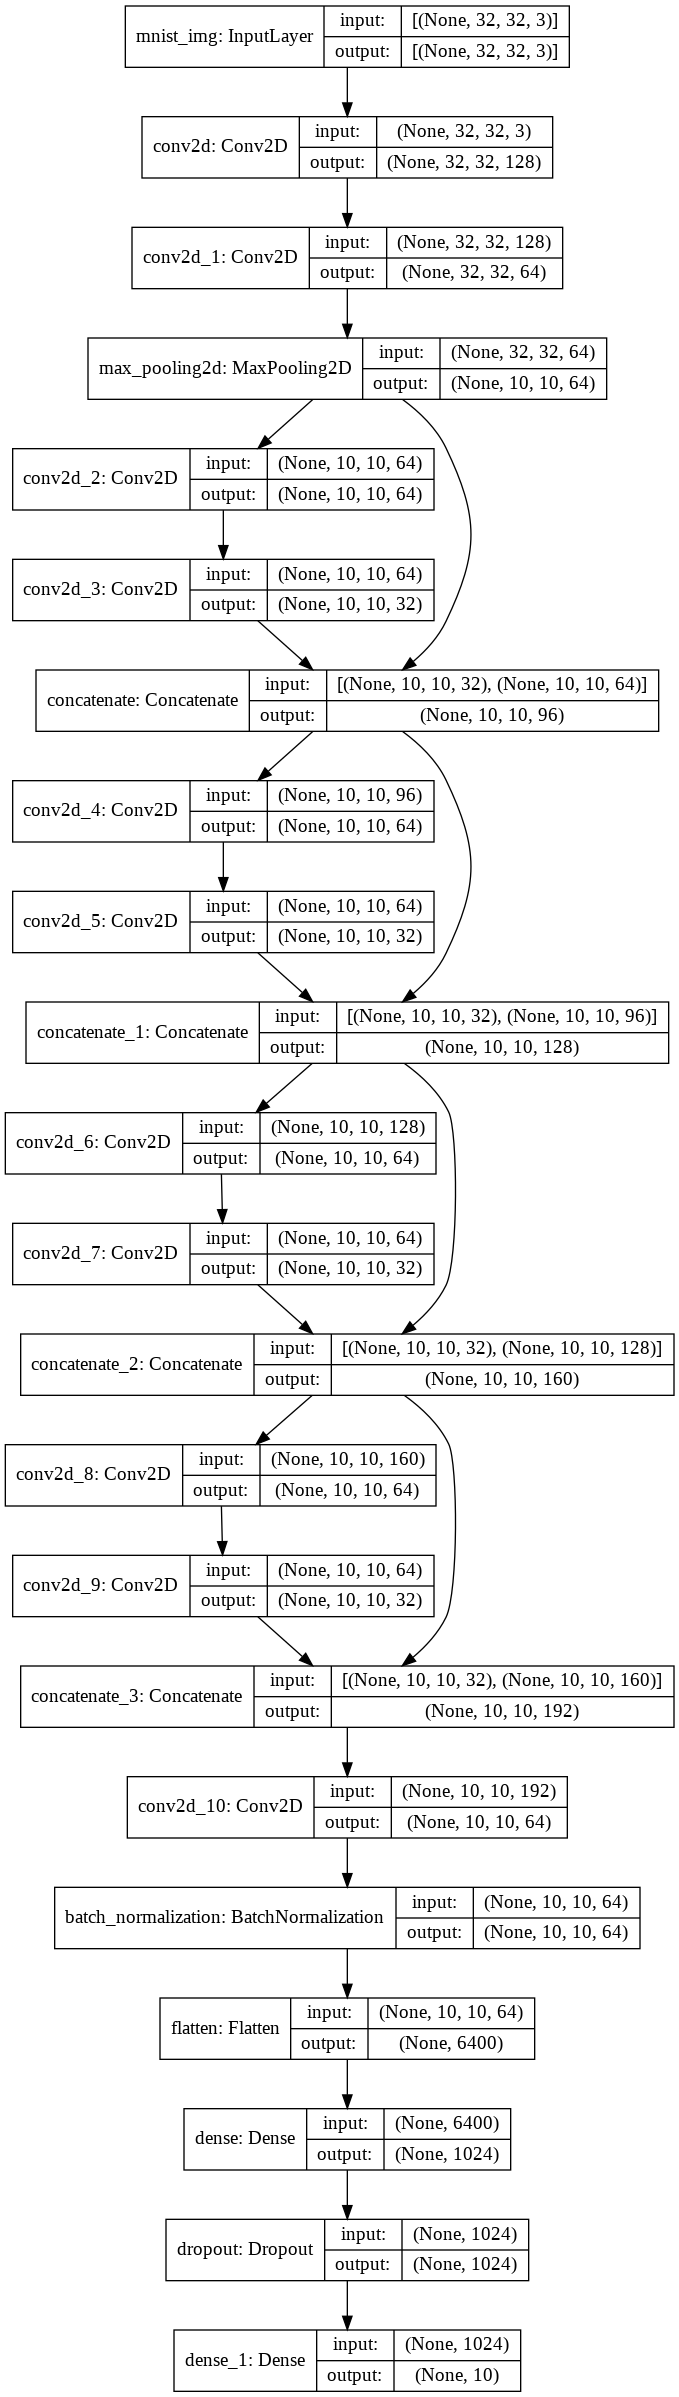

In [7]:
#Checking the model's summary and plot into a png file
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'simple_resnet.png', show_shapes = True)

In [8]:
#Compile the model

In [9]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop', metrics = ['accuracy'])

In [10]:
#Import data from keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [11]:
#preprocess the data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [12]:
x_train, x_test = (x_train/255.0).astype('float32'), (x_test/255.0).astype('float32')
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [13]:
y_train, y_test = tf.keras.utils.to_categorical(y_train, num_classes=10), tf.keras.utils.to_categorical(y_test, num_classes=10)


In [14]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [15]:
#Training the model without callback

In [16]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 64, epochs = 100, verbose = 2)

Epoch 1/100
782/782 - 22s - loss: 1.3946 - accuracy: 0.5331 - val_loss: 2.1263 - val_accuracy: 0.4143
Epoch 2/100
782/782 - 13s - loss: 0.9247 - accuracy: 0.6821 - val_loss: 1.2512 - val_accuracy: 0.5767
Epoch 3/100
782/782 - 14s - loss: 0.7895 - accuracy: 0.7312 - val_loss: 1.4363 - val_accuracy: 0.5736
Epoch 4/100
782/782 - 14s - loss: 0.7073 - accuracy: 0.7588 - val_loss: 3.3398 - val_accuracy: 0.5136
Epoch 5/100
782/782 - 14s - loss: 0.6272 - accuracy: 0.7857 - val_loss: 1.0381 - val_accuracy: 0.6658
Epoch 6/100
782/782 - 14s - loss: 0.5739 - accuracy: 0.8069 - val_loss: 1.4144 - val_accuracy: 0.7314
Epoch 7/100
782/782 - 14s - loss: 0.5212 - accuracy: 0.8258 - val_loss: 1.3672 - val_accuracy: 0.6866
Epoch 8/100
782/782 - 14s - loss: 0.4798 - accuracy: 0.8422 - val_loss: 1.8273 - val_accuracy: 0.6655
Epoch 9/100
782/782 - 14s - loss: 0.4437 - accuracy: 0.8531 - val_loss: 1.1410 - val_accuracy: 0.6877
Epoch 10/100
782/782 - 14s - loss: 0.4007 - accuracy: 0.8672 - val_loss: 1.0518 - 

In [17]:
#Using callback for early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
info = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 15, verbose =1, mode = 'auto', restore_best_weights= True)

In [19]:
model.fit(x_train, y_train, validation_split = 0.2, verbose = 2, epochs = 100, callbacks = [info], batch_size = 64)

Epoch 1/100
625/625 - 12s - loss: 0.0808 - accuracy: 0.9821 - val_loss: 0.0082 - val_accuracy: 0.9969
Epoch 2/100
625/625 - 11s - loss: 0.0704 - accuracy: 0.9836 - val_loss: 0.0229 - val_accuracy: 0.9941
Epoch 3/100
625/625 - 11s - loss: 0.0768 - accuracy: 0.9834 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 4/100
625/625 - 11s - loss: 0.0753 - accuracy: 0.9834 - val_loss: 0.0095 - val_accuracy: 0.9981
Epoch 5/100
625/625 - 11s - loss: 0.0704 - accuracy: 0.9840 - val_loss: 0.0071 - val_accuracy: 0.9981
Epoch 6/100
625/625 - 11s - loss: 0.0710 - accuracy: 0.9847 - val_loss: 0.0360 - val_accuracy: 0.9932
Epoch 7/100
625/625 - 11s - loss: 0.0655 - accuracy: 0.9848 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 8/100
625/625 - 11s - loss: 0.0747 - accuracy: 0.9845 - val_loss: 0.0125 - val_accuracy: 0.9960
Epoch 9/100
625/625 - 11s - loss: 0.0685 - accuracy: 0.9854 - val_loss: 0.0308 - val_accuracy: 0.9930
Epoch 10/100
625/625 - 11s - loss: 0.0737 - accuracy: 0.9848 - val_loss: 0.0130 - 

In [20]:
#Use callbacks as model checkpoint. To recovere at any training point incase of interuption

In [21]:
info1 = tf.keras.callbacks.ModelCheckpoint(filepath = 'my_resnet',
                                           monitor = 'val_loss',
                                           verbose = 1,
                                           save_best_only = True,
                                           mode = 'auto',save_freq = 'epoch')

In [23]:
#We can use a list of callbacks at once
model.fit(x_train, y_train, validation_split = 0.2, verbose = 2, callbacks = [info, info1], epochs = 100)

Epoch 1/100
1250/1250 - 16s - loss: 0.1193 - accuracy: 0.9772 - val_loss: 0.0592 - val_accuracy: 0.9918

Epoch 00001: val_loss improved from inf to 0.05921, saving model to my_resnet
INFO:tensorflow:Assets written to: my_resnet/assets
Epoch 2/100
1250/1250 - 15s - loss: 0.1238 - accuracy: 0.9764 - val_loss: 0.0133 - val_accuracy: 0.9957

Epoch 00002: val_loss improved from 0.05921 to 0.01326, saving model to my_resnet
INFO:tensorflow:Assets written to: my_resnet/assets
Epoch 3/100
1250/1250 - 15s - loss: 0.1190 - accuracy: 0.9770 - val_loss: 0.0267 - val_accuracy: 0.9924

Epoch 00003: val_loss did not improve from 0.01326
Epoch 4/100
1250/1250 - 15s - loss: 0.1274 - accuracy: 0.9761 - val_loss: 0.0400 - val_accuracy: 0.9901

Epoch 00004: val_loss did not improve from 0.01326
Epoch 5/100
1250/1250 - 15s - loss: 0.1297 - accuracy: 0.9761 - val_loss: 0.0095 - val_accuracy: 0.9980

Epoch 00005: val_loss improved from 0.01326 to 0.00947, saving model to my_resnet
INFO:tensorflow:Assets writ